In [7]:
import pandas as pd
import os
import random

cat_dataset = []
dog_dataset = []

dir = r"/home/plorenc/Desktop/AiR_ISS/ML/datasets"

for root, subfolders, files in os.walk(dir): 
    for file in files:
        file_path = os.path.join(root, file) 
        if "cat" in file.lower():
            cat_dataset.append((file_path, 0))
        elif "dog" in file.lower():
            dog_dataset.append((file_path, 1)) 


dataset = cat_dataset + dog_dataset
random.shuffle(dataset)

df = pd.DataFrame(dataset, columns=["path", "label"])

In [8]:
df.head()

,path,label
0,/home/plorenc/Desktop/AiR_ISS/ML/datasets/data...,1
1,/home/plorenc/Desktop/AiR_ISS/ML/datasets/data...,1
2,/home/plorenc/Desktop/AiR_ISS/ML/datasets/data...,0
3,/home/plorenc/Desktop/AiR_ISS/ML/datasets/data...,1
4,/home/plorenc/Desktop/AiR_ISS/ML/datasets/data...,0


### Extract last hidden layer

In [9]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                   include_top=False,
                   input_shape = (150, 150, 3))

2025-03-31 12:55:31.858489: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-03-31 12:55:31.863063: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [10]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
from tqdm import tqdm

tqdm.pandas() 

def extract_last_hidden_state(img_path, model):
    img = image.load_img(img_path, target_size=(150, 150))  # Skalowanie obrazu
    img_array = image.img_to_array(img)  # Konwersja do NumPy
    img_array = np.expand_dims(img_array, axis=0)  # Dodanie wymiaru batcha
    img_array = preprocess_input(img_array) 
    features = model.predict(img_array)

    return features.flatten()


df['Last_hidden_state'] = df['path'].progress_apply(lambda img_path: extract_last_hidden_state(img_path, model=conv_base))


  0%|          | 0/4000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


  0%|          | 2/4000 [00:00<08:59,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


  0%|          | 4/4000 [00:00<07:21,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


  0%|          | 6/4000 [00:00<06:46,  9.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


  0%|          | 8/4000 [00:00<06:35, 10.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


  0%|          | 10/4000 [00:01<06:29, 10.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


  0%|          | 12/4000 [00:01<06:22, 10.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


  0%|          | 14/4000 [00:01<06:16, 10.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


  0%|          | 16/4000 [00:01<06:16, 10.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


  0%|          | 18/4000 [00:01<06:25, 10.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


  0%|          | 20/4000 [00:02<07:36,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


  1%|          | 22/4000 [00:02<07:20,  9.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


  1%|          | 23/4000 [00:02<07:21,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


  1%|          | 25/4000 [00:02<07:09,  9.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


  1%|          | 26/4000 [00:02<07:15,  9.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


  1%|          | 27/4000 [00:02<07:11,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


  1%|          | 29/4000 [00:03<06:51,  9.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


  1%|          | 31/4000 [00:03<06:39,  9.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


  1%|          | 32/4000 [00:03<06:58,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


  1%|          | 33/4000 [00:03<07:00,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


  1%|          | 34/4000 [00:03<07:02,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


  1%|          | 35/4000 [00:03<07:02,  9.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


  1%|          | 36/4000 [00:03<06:55,  9.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


  1%|          | 38/4000 [00:03<06:45,  9.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


  1%|          | 40/4000 [00:04<06:41,  9.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


  1%|          | 42/4000 [00:04<06:31, 10.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


  1%|          | 44/4000 [00:04<06:40,  9.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


  1%|          | 46/4000 [00:04<06:33, 10.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


  1%|          | 48/4000 [00:05<07:29,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


  1%|▏         | 50/4000 [00:05<07:05,  9.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


  1%|▏         | 52/4000 [00:05<06:49,  9.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


  1%|▏         | 53/4000 [00:05<06:47,  9.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


  1%|▏         | 54/4000 [00:05<06:49,  9.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


  1%|▏         | 55/4000 [00:05<07:00,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


  1%|▏         | 56/4000 [00:05<07:00,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


  1%|▏         | 57/4000 [00:05<07:06,  9.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


  1%|▏         | 59/4000 [00:06<06:59,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  2%|▏         | 60/4000 [00:06<07:17,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


  2%|▏         | 61/4000 [00:06<07:08,  9.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


  2%|▏         | 62/4000 [00:06<07:01,  9.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


  2%|▏         | 64/4000 [00:06<06:41,  9.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


  2%|▏         | 66/4000 [00:06<06:32, 10.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


  2%|▏         | 68/4000 [00:07<06:29, 10.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


  2%|▏         | 70/4000 [00:07<06:27, 10.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


  2%|▏         | 72/4000 [00:07<06:23, 10.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


  2%|▏         | 74/4000 [00:07<06:27, 10.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


  2%|▏         | 76/4000 [00:07<06:36,  9.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


  2%|▏         | 78/4000 [00:08<06:31, 10.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


  2%|▏         | 80/4000 [00:08<06:22, 10.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


  2%|▏         | 82/4000 [00:08<06:19, 10.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


  2%|▏         | 84/4000 [00:08<06:29, 10.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


  2%|▏         | 86/4000 [00:08<06:27, 10.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


  2%|▏         | 88/4000 [00:09<06:36,  9.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


  2%|▏         | 89/4000 [00:09<06:48,  9.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


  2%|▏         | 90/4000 [00:09<06:55,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


  2%|▏         | 91/4000 [00:09<07:06,  9.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


  2%|▏         | 92/4000 [00:09<07:09,  9.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


  2%|▏         | 93/4000 [00:09<07:06,  9.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


  2%|▏         | 94/4000 [00:09<07:02,  9.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


  2%|▏         | 95/4000 [00:09<07:09,  9.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


  2%|▏         | 97/4000 [00:10<06:50,  9.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


  2%|▏         | 98/4000 [00:10<06:47,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


  2%|▎         | 100/4000 [00:10<06:39,  9.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


  3%|▎         | 102/4000 [00:10<06:32,  9.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


  3%|▎         | 103/4000 [00:10<06:43,  9.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


  3%|▎         | 104/4000 [00:10<06:41,  9.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


  3%|▎         | 105/4000 [00:10<06:50,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


  3%|▎         | 106/4000 [00:10<06:48,  9.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


  3%|▎         | 107/4000 [00:11<06:45,  9.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


  3%|▎         | 108/4000 [00:11<07:06,  9.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


  3%|▎         | 109/4000 [00:11<06:59,  9.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


  3%|▎         | 110/4000 [00:11<06:58,  9.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


  3%|▎         | 111/4000 [00:11<07:01,  9.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


  3%|▎         | 112/4000 [00:11<06:58,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


  3%|▎         | 113/4000 [00:11<06:54,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


  3%|▎         | 115/4000 [00:11<06:39,  9.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


  3%|▎         | 116/4000 [00:12<06:41,  9.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


  3%|▎         | 118/4000 [00:12<06:37,  9.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


  3%|▎         | 119/4000 [00:12<07:01,  9.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


  3%|▎         | 120/4000 [00:12<07:10,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


  3%|▎         | 121/4000 [00:12<07:17,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


  3%|▎         | 123/4000 [00:12<06:44,  9.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


  3%|▎         | 125/4000 [00:13<06:44,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


  3%|▎         | 126/4000 [00:13<06:52,  9.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


  3%|▎         | 127/4000 [00:13<06:56,  9.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


  3%|▎         | 129/4000 [00:13<06:43,  9.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


  3%|▎         | 130/4000 [00:13<06:42,  9.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


  3%|▎         | 131/4000 [00:13<07:07,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


  3%|▎         | 133/4000 [00:13<07:37,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


  3%|▎         | 134/4000 [00:14<07:32,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


  3%|▎         | 136/4000 [00:14<07:09,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


  3%|▎         | 137/4000 [00:14<07:04,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


  3%|▎         | 138/4000 [00:14<07:03,  9.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


  3%|▎         | 139/4000 [00:14<07:09,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


  4%|▎         | 140/4000 [00:14<06:57,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


  4%|▎         | 141/4000 [00:14<06:55,  9.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


  4%|▎         | 142/4000 [00:14<07:09,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


  4%|▎         | 143/4000 [00:15<07:03,  9.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


  4%|▎         | 144/4000 [00:15<07:06,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


  4%|▎         | 145/4000 [00:15<07:05,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


  4%|▎         | 146/4000 [00:15<07:01,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


  4%|▎         | 147/4000 [00:15<07:02,  9.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


  4%|▎         | 148/4000 [00:15<06:59,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


  4%|▍         | 150/4000 [00:15<06:34,  9.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


  4%|▍         | 152/4000 [00:15<06:43,  9.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


  4%|▍         | 153/4000 [00:16<06:40,  9.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


  4%|▍         | 154/4000 [00:16<06:40,  9.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


  4%|▍         | 155/4000 [00:16<07:56,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


  4%|▍         | 156/4000 [00:16<07:41,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


  4%|▍         | 157/4000 [00:16<07:28,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


  4%|▍         | 159/4000 [00:16<06:56,  9.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


  4%|▍         | 161/4000 [00:16<06:39,  9.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


  4%|▍         | 163/4000 [00:17<06:35,  9.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


  4%|▍         | 164/4000 [00:17<06:44,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


  4%|▍         | 165/4000 [00:17<07:01,  9.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


  4%|▍         | 166/4000 [00:17<06:56,  9.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


  4%|▍         | 167/4000 [00:17<06:52,  9.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


  4%|▍         | 168/4000 [00:17<06:49,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


  4%|▍         | 169/4000 [00:17<06:47,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


  4%|▍         | 170/4000 [00:18<08:14,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


  4%|▍         | 171/4000 [00:18<07:51,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


  4%|▍         | 172/4000 [00:18<07:32,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


  4%|▍         | 173/4000 [00:18<07:25,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


  4%|▍         | 174/4000 [00:18<07:07,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  4%|▍         | 175/4000 [00:18<07:26,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


  4%|▍         | 177/4000 [00:18<07:05,  8.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


  4%|▍         | 179/4000 [00:18<06:44,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


  4%|▍         | 180/4000 [00:19<06:42,  9.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


  5%|▍         | 182/4000 [00:19<06:33,  9.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


  5%|▍         | 183/4000 [00:19<06:40,  9.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


  5%|▍         | 184/4000 [00:19<06:50,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


  5%|▍         | 185/4000 [00:19<06:43,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


  5%|▍         | 186/4000 [00:19<06:38,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


  5%|▍         | 187/4000 [00:19<06:54,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


  5%|▍         | 188/4000 [00:19<06:49,  9.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


  5%|▍         | 189/4000 [00:20<06:59,  9.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


  5%|▍         | 190/4000 [00:20<06:56,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


  5%|▍         | 191/4000 [00:20<07:00,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


  5%|▍         | 192/4000 [00:20<07:18,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


  5%|▍         | 193/4000 [00:20<07:01,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


  5%|▍         | 194/4000 [00:20<07:07,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


  5%|▍         | 195/4000 [00:20<06:59,  9.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


  5%|▍         | 196/4000 [00:20<07:23,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


  5%|▍         | 197/4000 [00:20<07:14,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


  5%|▍         | 198/4000 [00:21<07:05,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


  5%|▍         | 199/4000 [00:21<07:00,  9.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


  5%|▌         | 200/4000 [00:21<06:53,  9.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


  5%|▌         | 201/4000 [00:21<06:45,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


  5%|▌         | 202/4000 [00:21<06:43,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


  5%|▌         | 203/4000 [00:21<06:48,  9.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


  5%|▌         | 204/4000 [00:21<06:50,  9.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


  5%|▌         | 205/4000 [00:21<07:15,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


  5%|▌         | 206/4000 [00:21<07:30,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


  5%|▌         | 207/4000 [00:22<07:48,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


  5%|▌         | 208/4000 [00:22<07:39,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


  5%|▌         | 210/4000 [00:22<07:06,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


  5%|▌         | 211/4000 [00:22<07:04,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


  5%|▌         | 212/4000 [00:22<06:57,  9.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


  5%|▌         | 213/4000 [00:22<06:59,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


  5%|▌         | 214/4000 [00:22<07:03,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  5%|▌         | 215/4000 [00:22<07:22,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


  5%|▌         | 216/4000 [00:23<07:17,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


  5%|▌         | 217/4000 [00:23<07:02,  8.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


  5%|▌         | 218/4000 [00:23<07:01,  8.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


  5%|▌         | 219/4000 [00:23<07:00,  8.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


  6%|▌         | 220/4000 [00:23<06:56,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


  6%|▌         | 221/4000 [00:23<06:55,  9.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


  6%|▌         | 222/4000 [00:23<06:45,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  6%|▌         | 223/4000 [00:23<06:56,  9.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  6%|▌         | 224/4000 [00:23<07:05,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


  6%|▌         | 225/4000 [00:24<07:03,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


  6%|▌         | 226/4000 [00:24<06:53,  9.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


  6%|▌         | 227/4000 [00:24<06:51,  9.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


  6%|▌         | 228/4000 [00:24<06:44,  9.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


  6%|▌         | 229/4000 [00:24<06:50,  9.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


  6%|▌         | 230/4000 [00:24<06:55,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


  6%|▌         | 231/4000 [00:24<06:47,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


  6%|▌         | 232/4000 [00:24<06:38,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


  6%|▌         | 233/4000 [00:24<07:09,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


  6%|▌         | 234/4000 [00:25<07:13,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


  6%|▌         | 235/4000 [00:25<07:12,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


  6%|▌         | 236/4000 [00:25<06:59,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


  6%|▌         | 237/4000 [00:25<07:09,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  6%|▌         | 238/4000 [00:25<07:07,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


  6%|▌         | 240/4000 [00:25<06:41,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


  6%|▌         | 241/4000 [00:25<06:37,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


  6%|▌         | 242/4000 [00:25<06:41,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


  6%|▌         | 243/4000 [00:26<06:57,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


  6%|▌         | 244/4000 [00:26<06:56,  9.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  6%|▌         | 245/4000 [00:26<07:00,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


  6%|▌         | 246/4000 [00:26<06:51,  9.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


  6%|▌         | 247/4000 [00:26<06:56,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


  6%|▌         | 248/4000 [00:26<06:52,  9.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


  6%|▌         | 249/4000 [00:26<06:43,  9.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


  6%|▋         | 250/4000 [00:26<06:50,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


  6%|▋         | 251/4000 [00:26<06:48,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  6%|▋         | 252/4000 [00:27<07:13,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


  6%|▋         | 253/4000 [00:27<07:49,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


  6%|▋         | 254/4000 [00:27<07:28,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


  6%|▋         | 255/4000 [00:27<07:11,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


  6%|▋         | 256/4000 [00:27<07:08,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


  6%|▋         | 257/4000 [00:27<06:52,  9.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


  6%|▋         | 258/4000 [00:27<06:52,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


  6%|▋         | 260/4000 [00:27<06:29,  9.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


  7%|▋         | 261/4000 [00:28<06:58,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


  7%|▋         | 262/4000 [00:28<07:15,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


  7%|▋         | 263/4000 [00:28<07:11,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


  7%|▋         | 264/4000 [00:28<07:13,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


  7%|▋         | 265/4000 [00:28<07:01,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


  7%|▋         | 266/4000 [00:28<06:59,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


  7%|▋         | 267/4000 [00:28<06:55,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


  7%|▋         | 268/4000 [00:28<06:46,  9.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


  7%|▋         | 269/4000 [00:28<06:44,  9.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


  7%|▋         | 270/4000 [00:29<06:52,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


  7%|▋         | 271/4000 [00:29<07:04,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


  7%|▋         | 272/4000 [00:29<06:55,  8.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


  7%|▋         | 273/4000 [00:29<06:59,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


  7%|▋         | 274/4000 [00:29<06:54,  8.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


  7%|▋         | 275/4000 [00:29<06:47,  9.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


  7%|▋         | 276/4000 [00:29<06:45,  9.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


  7%|▋         | 277/4000 [00:29<06:46,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


  7%|▋         | 278/4000 [00:29<06:59,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


  7%|▋         | 279/4000 [00:30<06:50,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  7%|▋         | 280/4000 [00:30<07:05,  8.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


  7%|▋         | 281/4000 [00:30<06:53,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


  7%|▋         | 282/4000 [00:30<06:48,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


  7%|▋         | 283/4000 [00:30<06:46,  9.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


  7%|▋         | 284/4000 [00:30<06:51,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


  7%|▋         | 285/4000 [00:30<06:55,  8.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


  7%|▋         | 287/4000 [00:30<06:42,  9.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


  7%|▋         | 288/4000 [00:31<06:49,  9.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  7%|▋         | 289/4000 [00:31<07:18,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


  7%|▋         | 290/4000 [00:31<07:07,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


  7%|▋         | 291/4000 [00:31<07:05,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


  7%|▋         | 292/4000 [00:31<06:52,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


  7%|▋         | 293/4000 [00:31<06:46,  9.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


  7%|▋         | 295/4000 [00:31<06:25,  9.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


  7%|▋         | 296/4000 [00:31<06:25,  9.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


  7%|▋         | 297/4000 [00:32<06:40,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  7%|▋         | 298/4000 [00:32<07:08,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


  7%|▋         | 299/4000 [00:32<07:00,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


  8%|▊         | 300/4000 [00:32<07:06,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


  8%|▊         | 301/4000 [00:32<06:56,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


  8%|▊         | 302/4000 [00:32<07:06,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


  8%|▊         | 303/4000 [00:32<07:02,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


  8%|▊         | 304/4000 [00:32<07:10,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


  8%|▊         | 306/4000 [00:33<06:37,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  8%|▊         | 307/4000 [00:33<07:02,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


  8%|▊         | 308/4000 [00:33<07:00,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


  8%|▊         | 309/4000 [00:33<06:47,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


  8%|▊         | 310/4000 [00:33<06:39,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


  8%|▊         | 311/4000 [00:33<06:31,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


  8%|▊         | 312/4000 [00:33<06:33,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


  8%|▊         | 314/4000 [00:33<06:23,  9.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


  8%|▊         | 316/4000 [00:34<06:07, 10.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


  8%|▊         | 317/4000 [00:34<06:31,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


  8%|▊         | 319/4000 [00:34<06:13,  9.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


  8%|▊         | 321/4000 [00:34<06:18,  9.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


  8%|▊         | 322/4000 [00:34<06:17,  9.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


  8%|▊         | 323/4000 [00:34<06:16,  9.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


  8%|▊         | 324/4000 [00:34<06:14,  9.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


  8%|▊         | 326/4000 [00:35<06:00, 10.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


  8%|▊         | 328/4000 [00:35<05:57, 10.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


  8%|▊         | 330/4000 [00:35<05:59, 10.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


  8%|▊         | 332/4000 [00:35<06:07,  9.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


  8%|▊         | 334/4000 [00:35<06:05, 10.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  8%|▊         | 336/4000 [00:36<06:23,  9.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


  8%|▊         | 338/4000 [00:36<06:14,  9.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


  8%|▊         | 340/4000 [00:36<06:07,  9.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


  9%|▊         | 342/4000 [00:36<06:11,  9.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


  9%|▊         | 344/4000 [00:36<06:02, 10.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


  9%|▊         | 346/4000 [00:37<06:03, 10.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


  9%|▊         | 348/4000 [00:37<05:59, 10.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


  9%|▉         | 350/4000 [00:37<05:57, 10.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


  9%|▉         | 352/4000 [00:37<06:21,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


  9%|▉         | 354/4000 [00:37<06:19,  9.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


  9%|▉         | 355/4000 [00:38<06:16,  9.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


  9%|▉         | 356/4000 [00:38<06:15,  9.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


  9%|▉         | 358/4000 [00:38<06:19,  9.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


  9%|▉         | 359/4000 [00:38<06:16,  9.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


  9%|▉         | 361/4000 [00:38<06:06,  9.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


  9%|▉         | 363/4000 [00:38<06:03,  9.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


  9%|▉         | 365/4000 [00:39<06:00, 10.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


  9%|▉         | 367/4000 [00:39<06:15,  9.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


  9%|▉         | 369/4000 [00:39<06:06,  9.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


  9%|▉         | 371/4000 [00:39<06:08,  9.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


  9%|▉         | 372/4000 [00:39<06:07,  9.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


  9%|▉         | 374/4000 [00:40<06:01, 10.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


  9%|▉         | 376/4000 [00:40<06:26,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


  9%|▉         | 378/4000 [00:40<06:11,  9.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


  9%|▉         | 379/4000 [00:40<06:12,  9.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 10%|▉         | 380/4000 [00:40<06:28,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 10%|▉         | 381/4000 [00:40<06:34,  9.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 10%|▉         | 382/4000 [00:40<06:28,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 10%|▉         | 384/4000 [00:41<06:14,  9.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 10%|▉         | 386/4000 [00:41<05:57, 10.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 10%|▉         | 388/4000 [00:41<05:50, 10.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 10%|▉         | 390/4000 [00:41<05:44, 10.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 10%|▉         | 392/4000 [00:41<05:38, 10.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 10%|▉         | 394/4000 [00:42<05:41, 10.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 10%|▉         | 396/4000 [00:42<06:29,  9.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 10%|▉         | 398/4000 [00:42<06:09,  9.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 10%|█         | 400/4000 [00:42<06:36,  9.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 10%|█         | 402/4000 [00:42<06:20,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 10%|█         | 404/4000 [00:43<06:07,  9.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 10%|█         | 406/4000 [00:43<05:58, 10.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 10%|█         | 408/4000 [00:43<05:56, 10.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 10%|█         | 410/4000 [00:43<05:56, 10.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 10%|█         | 412/4000 [00:43<06:03,  9.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 10%|█         | 413/4000 [00:44<06:20,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 10%|█         | 414/4000 [00:44<06:29,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 10%|█         | 415/4000 [00:44<06:28,  9.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 10%|█         | 416/4000 [00:44<06:28,  9.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 10%|█         | 417/4000 [00:44<06:34,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 10%|█         | 418/4000 [00:44<06:36,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 10%|█         | 419/4000 [00:44<06:42,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 10%|█         | 420/4000 [00:44<06:47,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 11%|█         | 421/4000 [00:44<06:49,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 11%|█         | 422/4000 [00:45<07:15,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 11%|█         | 423/4000 [00:45<07:14,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 11%|█         | 424/4000 [00:45<07:09,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 11%|█         | 425/4000 [00:45<07:07,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 11%|█         | 426/4000 [00:45<06:52,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 11%|█         | 427/4000 [00:45<06:42,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 11%|█         | 428/4000 [00:45<06:47,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 11%|█         | 429/4000 [00:45<06:55,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 11%|█         | 430/4000 [00:45<06:59,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 11%|█         | 431/4000 [00:46<07:16,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 11%|█         | 432/4000 [00:46<07:17,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 11%|█         | 433/4000 [00:46<07:06,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 11%|█         | 434/4000 [00:46<07:00,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 11%|█         | 435/4000 [00:46<07:10,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 11%|█         | 436/4000 [00:46<07:10,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 11%|█         | 437/4000 [00:46<07:00,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 11%|█         | 438/4000 [00:46<07:02,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 11%|█         | 439/4000 [00:47<06:59,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 11%|█         | 440/4000 [00:47<07:24,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 11%|█         | 441/4000 [00:47<07:22,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 11%|█         | 442/4000 [00:47<07:16,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 11%|█         | 443/4000 [00:47<07:12,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 11%|█         | 444/4000 [00:47<07:14,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 11%|█         | 445/4000 [00:47<07:02,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 11%|█         | 446/4000 [00:47<06:56,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 11%|█         | 447/4000 [00:48<06:58,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 11%|█         | 448/4000 [00:48<07:02,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 11%|█         | 449/4000 [00:48<07:30,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 11%|█▏        | 450/4000 [00:48<07:32,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 11%|█▏        | 451/4000 [00:48<07:27,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 11%|█▏        | 452/4000 [00:48<07:16,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 11%|█▏        | 453/4000 [00:48<07:16,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 11%|█▏        | 454/4000 [00:48<07:16,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 11%|█▏        | 455/4000 [00:49<07:05,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 11%|█▏        | 456/4000 [00:49<07:06,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 11%|█▏        | 457/4000 [00:49<07:31,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 11%|█▏        | 458/4000 [00:49<07:26,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 11%|█▏        | 459/4000 [00:49<07:10,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 12%|█▏        | 460/4000 [00:49<07:06,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 12%|█▏        | 461/4000 [00:49<06:53,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 12%|█▏        | 462/4000 [00:49<06:53,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 12%|█▏        | 463/4000 [00:49<06:49,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 12%|█▏        | 464/4000 [00:50<06:38,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 12%|█▏        | 465/4000 [00:50<06:36,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 12%|█▏        | 466/4000 [00:50<07:00,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 12%|█▏        | 467/4000 [00:50<07:12,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 12%|█▏        | 468/4000 [00:50<07:11,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 12%|█▏        | 469/4000 [00:50<07:11,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 12%|█▏        | 470/4000 [00:50<06:59,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 12%|█▏        | 471/4000 [00:50<06:50,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 12%|█▏        | 472/4000 [00:51<07:16,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 12%|█▏        | 473/4000 [00:51<07:07,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 12%|█▏        | 474/4000 [00:51<07:02,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 12%|█▏        | 475/4000 [00:51<07:03,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 12%|█▏        | 476/4000 [00:51<06:54,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 12%|█▏        | 477/4000 [00:51<06:59,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 12%|█▏        | 478/4000 [00:51<06:52,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 12%|█▏        | 479/4000 [00:51<06:48,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 12%|█▏        | 480/4000 [00:52<07:19,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 12%|█▏        | 481/4000 [00:52<07:15,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 12%|█▏        | 482/4000 [00:52<07:07,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 12%|█▏        | 483/4000 [00:52<06:54,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 12%|█▏        | 484/4000 [00:52<06:49,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 12%|█▏        | 485/4000 [00:52<06:43,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 12%|█▏        | 486/4000 [00:52<06:43,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 12%|█▏        | 487/4000 [00:52<06:35,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 12%|█▏        | 488/4000 [00:52<06:54,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 12%|█▏        | 489/4000 [00:53<07:01,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 12%|█▏        | 490/4000 [00:53<06:54,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 12%|█▏        | 491/4000 [00:53<06:56,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 12%|█▏        | 492/4000 [00:53<06:50,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 12%|█▏        | 493/4000 [00:53<06:41,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 12%|█▏        | 494/4000 [00:53<06:42,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 12%|█▏        | 495/4000 [00:53<06:33,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 12%|█▏        | 496/4000 [00:53<06:47,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 12%|█▏        | 497/4000 [00:54<07:02,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 12%|█▏        | 498/4000 [00:54<07:06,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 12%|█▏        | 499/4000 [00:54<06:58,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 12%|█▎        | 500/4000 [00:54<06:53,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 13%|█▎        | 501/4000 [00:54<06:58,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 13%|█▎        | 502/4000 [00:54<06:54,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 13%|█▎        | 503/4000 [00:54<06:54,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 13%|█▎        | 504/4000 [00:54<06:45,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 13%|█▎        | 505/4000 [00:54<06:59,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 13%|█▎        | 506/4000 [00:55<06:59,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 13%|█▎        | 507/4000 [00:55<06:51,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 13%|█▎        | 508/4000 [00:55<06:53,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 13%|█▎        | 509/4000 [00:55<06:40,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 13%|█▎        | 510/4000 [00:55<06:34,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 13%|█▎        | 511/4000 [00:55<06:24,  9.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 13%|█▎        | 512/4000 [00:55<06:18,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 13%|█▎        | 513/4000 [00:55<06:40,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 13%|█▎        | 514/4000 [00:56<06:45,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 13%|█▎        | 515/4000 [00:56<06:37,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 13%|█▎        | 516/4000 [00:56<06:41,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 13%|█▎        | 517/4000 [00:56<06:31,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 13%|█▎        | 518/4000 [00:56<06:29,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 13%|█▎        | 519/4000 [00:56<06:28,  8.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 13%|█▎        | 520/4000 [00:56<06:23,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 13%|█▎        | 521/4000 [00:56<06:34,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 13%|█▎        | 522/4000 [00:56<06:31,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 13%|█▎        | 523/4000 [00:57<06:35,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 13%|█▎        | 524/4000 [00:57<06:30,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 13%|█▎        | 525/4000 [00:57<06:31,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 13%|█▎        | 526/4000 [00:57<06:40,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 13%|█▎        | 527/4000 [00:57<06:44,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 13%|█▎        | 528/4000 [00:57<06:48,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 13%|█▎        | 529/4000 [00:57<06:56,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 13%|█▎        | 530/4000 [00:57<07:02,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 13%|█▎        | 531/4000 [00:57<06:53,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 13%|█▎        | 532/4000 [00:58<06:55,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 13%|█▎        | 533/4000 [00:58<06:40,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 13%|█▎        | 534/4000 [00:58<06:44,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 13%|█▎        | 535/4000 [00:58<06:32,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 13%|█▎        | 536/4000 [00:58<06:24,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 13%|█▎        | 537/4000 [00:58<06:44,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 13%|█▎        | 538/4000 [00:58<06:49,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 13%|█▎        | 539/4000 [00:58<06:42,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 14%|█▎        | 540/4000 [00:58<06:40,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 14%|█▎        | 541/4000 [00:59<06:34,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 14%|█▎        | 542/4000 [00:59<06:28,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 14%|█▎        | 543/4000 [00:59<06:25,  8.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 14%|█▎        | 544/4000 [00:59<07:07,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 14%|█▎        | 545/4000 [00:59<07:01,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 14%|█▎        | 546/4000 [00:59<06:47,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 14%|█▎        | 547/4000 [00:59<06:37,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 14%|█▎        | 548/4000 [00:59<06:29,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 14%|█▎        | 549/4000 [01:00<06:37,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 14%|█▍        | 550/4000 [01:00<06:31,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 14%|█▍        | 551/4000 [01:00<07:00,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 14%|█▍        | 552/4000 [01:00<07:01,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 14%|█▍        | 553/4000 [01:00<06:51,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 14%|█▍        | 554/4000 [01:00<06:43,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 14%|█▍        | 555/4000 [01:00<06:38,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 14%|█▍        | 556/4000 [01:00<06:43,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 14%|█▍        | 557/4000 [01:00<06:36,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 14%|█▍        | 558/4000 [01:01<06:34,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 14%|█▍        | 559/4000 [01:01<06:45,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 14%|█▍        | 560/4000 [01:01<06:45,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 14%|█▍        | 561/4000 [01:01<06:43,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 14%|█▍        | 562/4000 [01:01<06:41,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 14%|█▍        | 563/4000 [01:01<06:36,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 14%|█▍        | 564/4000 [01:01<06:29,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 14%|█▍        | 565/4000 [01:01<06:25,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 14%|█▍        | 566/4000 [01:02<06:53,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 14%|█▍        | 567/4000 [01:02<06:55,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 14%|█▍        | 568/4000 [01:02<06:44,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 14%|█▍        | 569/4000 [01:02<06:38,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 14%|█▍        | 570/4000 [01:02<06:30,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 14%|█▍        | 571/4000 [01:02<06:32,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 14%|█▍        | 572/4000 [01:02<06:24,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 14%|█▍        | 573/4000 [01:02<06:37,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 14%|█▍        | 574/4000 [01:02<06:41,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 14%|█▍        | 575/4000 [01:03<06:37,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 14%|█▍        | 576/4000 [01:03<06:38,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 14%|█▍        | 577/4000 [01:03<06:29,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 14%|█▍        | 578/4000 [01:03<06:24,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 14%|█▍        | 579/4000 [01:03<06:19,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 14%|█▍        | 580/4000 [01:03<06:22,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 15%|█▍        | 581/4000 [01:03<06:38,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 15%|█▍        | 582/4000 [01:03<06:39,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 15%|█▍        | 583/4000 [01:03<06:29,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 15%|█▍        | 584/4000 [01:04<06:23,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 15%|█▍        | 585/4000 [01:04<06:23,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 15%|█▍        | 586/4000 [01:04<06:22,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 15%|█▍        | 587/4000 [01:04<06:18,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 15%|█▍        | 588/4000 [01:04<06:42,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 15%|█▍        | 589/4000 [01:04<06:38,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 15%|█▍        | 590/4000 [01:04<06:30,  8.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 15%|█▍        | 591/4000 [01:04<06:33,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 15%|█▍        | 592/4000 [01:05<06:34,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 15%|█▍        | 593/4000 [01:05<06:27,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 15%|█▍        | 594/4000 [01:05<06:27,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 15%|█▍        | 595/4000 [01:05<06:38,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 15%|█▍        | 596/4000 [01:05<06:32,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 15%|█▍        | 597/4000 [01:05<06:33,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 15%|█▍        | 598/4000 [01:05<06:27,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 15%|█▍        | 599/4000 [01:05<06:29,  8.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 15%|█▌        | 600/4000 [01:05<06:25,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 15%|█▌        | 601/4000 [01:06<06:29,  8.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 15%|█▌        | 602/4000 [01:06<06:47,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 15%|█▌        | 603/4000 [01:06<06:44,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 15%|█▌        | 604/4000 [01:06<06:34,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 15%|█▌        | 605/4000 [01:06<06:31,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 15%|█▌        | 606/4000 [01:06<06:34,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 15%|█▌        | 607/4000 [01:06<06:30,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 15%|█▌        | 608/4000 [01:06<06:19,  8.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 15%|█▌        | 609/4000 [01:06<06:39,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 15%|█▌        | 610/4000 [01:07<06:40,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 15%|█▌        | 611/4000 [01:07<06:32,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 15%|█▌        | 612/4000 [01:07<06:28,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 15%|█▌        | 613/4000 [01:07<06:24,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 15%|█▌        | 614/4000 [01:07<06:17,  8.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 15%|█▌        | 615/4000 [01:07<06:12,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 15%|█▌        | 616/4000 [01:07<06:28,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 15%|█▌        | 617/4000 [01:07<06:24,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 15%|█▌        | 618/4000 [01:07<06:25,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 15%|█▌        | 619/4000 [01:08<06:15,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 16%|█▌        | 620/4000 [01:08<06:15,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 16%|█▌        | 621/4000 [01:08<06:26,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 16%|█▌        | 622/4000 [01:08<06:18,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 16%|█▌        | 623/4000 [01:08<06:39,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 16%|█▌        | 624/4000 [01:08<06:42,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 16%|█▌        | 625/4000 [01:08<06:33,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 16%|█▌        | 626/4000 [01:08<06:31,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 16%|█▌        | 627/4000 [01:09<06:27,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 16%|█▌        | 628/4000 [01:09<06:27,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 16%|█▌        | 629/4000 [01:09<06:37,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 16%|█▌        | 630/4000 [01:09<06:49,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 16%|█▌        | 631/4000 [01:09<06:11,  9.07it/s]


KeyboardInterrupt: 

In [ ]:
from keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam


input_shape = len(df['Last_hidden_state'].loc[0])

clf_head = Sequential()
clf_head.add(layers.Dense(input_shape, activation='relu'))
clf_head.add(layers.Dense(256, activation='relu'))
clf_head.add(layers.Dense(128, activation='relu'))
clf_head.add(layers.Dense(1, activation='sigmoid'))

clf_head.compile(optimizer=Adam(learning_rate=0.001),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

X_train = np.vstack(train_df["Last_hidden_state"].values) 
X_val = np.vstack(val_df["Last_hidden_state"].values)
y_train = train_df["label"].values
y_val = val_df["label"].values

In [ ]:
history = clf_head.fit(X_train, y_train, 
                       validation_data=(X_val, y_val),
                       epochs=5, batch_size=32, verbose=1)

Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 393ms/step - accuracy: 1.0000 - loss: 3.6807e-06 - val_accuracy: 0.9650 - val_loss: 0.4325
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 385ms/step - accuracy: 1.0000 - loss: 4.9193e-06 - val_accuracy: 0.9650 - val_loss: 0.4327
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 390ms/step - accuracy: 1.0000 - loss: 3.5600e-06 - val_accuracy: 0.9650 - val_loss: 0.4329
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 395ms/step - accuracy: 1.0000 - loss: 1.8609e-06 - val_accuracy: 0.9650 - val_loss: 0.4331
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 398ms/step - accuracy: 1.0000 - loss: 2.0580e-06 - val_accuracy: 0.9650 - val_loss: 0.4333


In [ ]:
df['predict'] = df['path'].apply(lambda x: clf_head.predict(cv2.imread(x, cv2.IMREAD)))

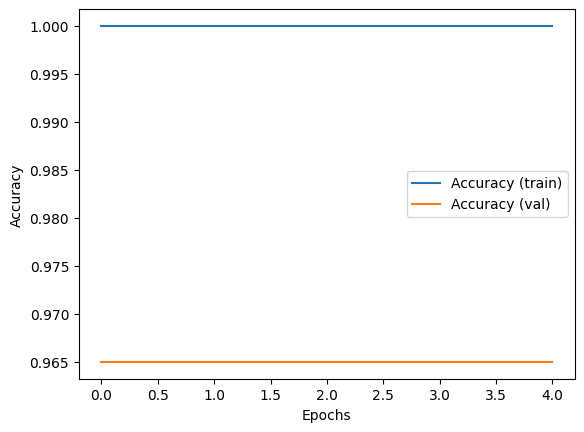

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Accuracy (train)')
plt.plot(history.history['val_accuracy'], label='Accuracy (val)')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Fine-tuning

In [ ]:
modelVGG = Sequential()
modelVGG.add(layers.Rescaling(1./255, input_shape=(150, 150, 3)))
modelVGG.add(conv_base)
modelVGG.add(layers.Flatten())
modelVGG.add(layers.Dense(256, activation='relu'))
modelVGG.add(layers.Dense(128, activation='relu'))
modelVGG.add(layers.Dense(1, activation='sigmoid'))


print('This is the number of trainable weights '
      'before freezing the conv base:', len(modelVGG.trainable_weights))

conv_base.trainable = False

print('This is the number of trainable weights '
      'before freezing the conv base:', len(modelVGG.trainable_weights))

This is the number of trainable weights before freezing the conv base: 32
This is the number of trainable weights before freezing the conv base: 6


/home/plorenc/Desktop/AiR_ISS/OpenCL/lab3/venv/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
conv_base.trainable = True

modelVGG.compile(optimizer=Adam(learning_rate=0.001),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing import  image_dataset_from_directory
import tensorflow as tf

train_dir = r'/home/plorenc/Desktop/AiR_ISS/ML/datasets/dataset_cats_dogs' 


data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),  
    layers.RandomRotation(0.2),  
    layers.RandomZoom(0.2),  
    layers.RandomTranslation(0.2, 0.2),  
])



train_dataset = image_dataset_from_directory(
    train_dir,  # Ścieżka do folderu
    labels="inferred", 
    label_mode="binary",  # Zastosowanie binarnej klasyfikacji
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(150, 150),  # Zmiana rozmiaru obrazków na 150x150
    shuffle=True,
    validation_split=0.2,  # 20% danych przeznaczymy na walidację
    subset="training",  # Zbiór treningowy
    seed=42
)

validation_dataset = image_dataset_from_directory(
    train_dir,  # Ścieżka do folderu
    labels="inferred", 
    label_mode="binary",  # Zastosowanie binarnej klasyfikacji
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(150, 150),  # Zmiana rozmiaru obrazków na 150x150
    shuffle=True,
    validation_split=0.2,  # 20% danych przeznaczymy na walidację
    subset="validation",  # Zbiór walidacyjny
    seed=42
)

train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x, training=True), y))
validation_dataset = validation_dataset.map(lambda x, y: (data_augmentation(x, training=True), y))

Found 4000 files belonging to 2 classes.
Using 3200 files for training.
Found 4000 files belonging to 2 classes.
Using 800 files for validation.


In [ ]:
history = modelVGG.fit(train_dataset,
                       validation_data=validation_dataset,
                       epochs=5, batch_size=32, verbose=1)

Epoch 1/5
 36/100 ━━━━━━━━━━━━━━━━━━━━ 5:51 5s/step - accuracy: 0.5053 - loss: 0.9977

KeyboardInterrupt: 

### Torch (fine tune)

In [ ]:
from torchvision import models
from torch import nn
import torch

model_torch = models.vgg16(weights=True)  

model_torch.classifier = nn.Sequential(
    nn.Linear(25088, 4096),  
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(4096, 256),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(256, 1),
    nn.Sigmoid()
)

device = 'cuda' if torch.cuda.is_available() else 'cpu'


model_torch.to(device)

/home/plorenc/Desktop/AiR_ISS/OpenCL/lab3/venv/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
from torch.utils.data import Dataset,DataLoader
import torchvision
from torchvision import transforms
import cv2
import os
import random
from sklearn.model_selection import train_test_split


cat_dataset = []
dog_dataset = []

dir = r"/home/plorenc/Desktop/AiR_ISS/ML/datasets"

for root, subfolders, files in os.walk(dir): 
    for file in files:
        file_path = os.path.join(root, file) 
        if "cat" in file.lower():
            cat_dataset.append((file_path, 0))
        elif "dog" in file.lower():
            dog_dataset.append((file_path, 1)) 


combined = cat_dataset + dog_dataset
random.shuffle(combined)

train_dir, test_dir = train_test_split(combined, test_size=0.2, random_state=42)
test_dir, val_dir = train_test_split(test_dir, test_size=0.2, random_state=42)

class CatDogDataset(Dataset):
    def __init__(self, data):
        """
        data: Lista krotek (ścieżka_do_obrazu, etykieta)
        """
        self.data = data
        
        self.transform = transforms.Compose([
            transforms.ToPILImage(), 
            transforms.Resize((256, 256)),  
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  
        ])

    def __getitem__(self, index):
        """
        Zwraca obraz i etykietę dla danego indexu
        """
        image_path, label = self.data[index]
        
        # Wczytanie obrazu
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
        
        if self.transform:
            image = self.transform(image)
        
        return image, torch.tensor(label, dtype=torch.float32)

    def __len__(self):
        """
        Zwraca liczbę elementów w zbiorze danych
        """
        return len(self.data)

train_data = CatDogDataset(train_dir)
test_data = CatDogDataset(test_dir)
val_data = CatDogDataset(val_dir)

BATCH_SIZE = 32

train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)
val_dataloader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=False)

In [ ]:
next(iter(train_dataloader))[1]

tensor([0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
        0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.])

In [ ]:
from torch import optim

optimizer = optim.Adam(model_torch.parameters(), lr=0.001)
loss_fn = nn.BCELoss()

EPOCHS = 10

def train(model, train_loader, loss_fn, optimizer, device):
    model.train()  # Ustawienie modelu w tryb treningowy
    running_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    avg_loss = running_loss / len(train_loader)
    return avg_loss


def validate(model, val_loader, loss_fn, device):
    model.eval() 
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad(): 
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = loss_fn(outputs.squeeze(), labels)
            running_loss += loss.item()
            predicted = (outputs.squeeze() > 0.5).float() 
            correct += (predicted == labels).sum().item()  
            total += labels.size(0) 

    avg_loss = running_loss / len(val_loader)
    accuracy = 100 * correct / total 
    return avg_loss, accuracy


In [ ]:
from tqdm.auto import tqdm


for epoch in tqdm(range(EPOCHS)):
    # Trening
    train_loss = train(model_torch, train_dataloader, loss_fn, optimizer, device)
    
    # Walidacja
    val_loss, val_accuracy = validate(model_torch, val_dataloader, loss_fn, device)
    
    # Drukowanie wyników
    print(f"Epoch [{epoch+1}/{EPOCHS}]:")
    print(f"  Training Loss: {train_loss:.4f}")
    print(f"  Validation Loss: {val_loss:.4f}")
    print(f"  Validation Accuracy: {val_accuracy:.2f}%")

/home/plorenc/Desktop/AiR_ISS/OpenCL/lab3/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/10 [00:12<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
torch.cuda.empty_cache()